In [46]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import seaborn as sns
import re
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import time
%matplotlib inline
plt.style.use('fivethirtyeight')

In [47]:
df = pd.read_csv('NKLA.csv')
data = df.tail(364).loc[0::7]
dates = np.arange(len(data.Date))
datelabels = df.loc[data.index].Date[::7].apply(lambda x: re.sub('\d{4}[-]', '', x))
years = df.loc[data.index].Date[::7].apply(lambda x: re.sub('[-]\d{2}[-]\d{2}', '', x))
datelabels


641    12-24
690    03-09
739    05-18
788    07-28
837    10-06
886    12-15
935    02-25
984    05-06
Name: Date, dtype: object

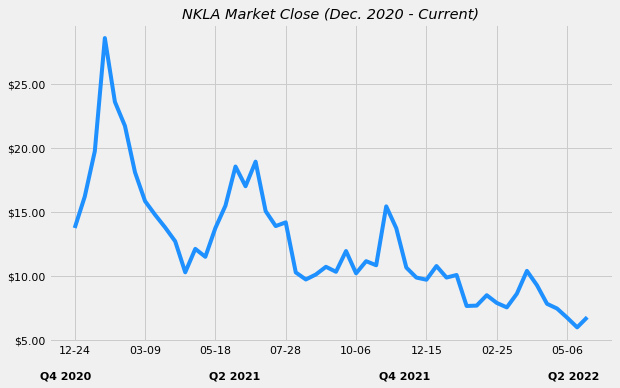

In [48]:
plt.rc('xtick', labelsize=11) 
plt.rc('ytick', labelsize=11) 
fig = plt.figure(figsize=(9,6.5))
ax = fig.add_subplot(111)
ax2 = ax.twiny()
ax2.grid(None)
fig.subplots_adjust(bottom=.2)

plt.title('NKLA Market Close (Dec. 2020 - Current)', fontsize=14.5, fontstyle='italic')
ax.yaxis.set_major_formatter('${x:.2f}')

ax.set_xticks(dates[::7])
ax.plot(dates, data.Close.values, color='dodgerblue')
ax2.xaxis.set_ticks_position("bottom")
ax2.spines['bottom'].set_position(("axes", -.08))
ax2.set_xticks(np.array([0.03,0.33,0.63,0.93]))
ax2.set_xticklabels(['Q4 2020', 'Q2 2021', 'Q4 2021', 'Q2 2022'], fontweight='bold')
ax.set_xticklabels(datelabels, fontsize=11)
plt.show()


In [49]:
X = df.drop(columns=['Open', 'Date', 'Adj Close'])
y = pd.Series(df.Open)
print('(X) rows: ' + str(X.shape[0]) + ', columns: ' + str(X.shape[1]))
print('(y) rows: ' + str(len(y)) + ', columns: ' + str(y.ndim))

(X) rows: 1005, columns: 4
(y) rows: 1005, columns: 1


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(703, 4) (302, 4) (703,) (302,)


,High,Low,Close,Volume
0,9.580,9.570,9.58,402600
1,9.560,9.560,9.56,300000
2,9.580,9.560,9.57,179100
3,9.570,9.570,9.57,0
4,9.570,9.570,9.57,0
...,...,...,...,...
1000,7.400,6.860,7.06,12169300
1001,7.225,6.590,6.77,10207900
1002,7.440,6.530,7.25,24810500
1003,7.080,6.615,6.66,10942000


In [51]:
regr = lm.LinearRegression()
regr = regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
res = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred,2)})
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.round(RMSE,3),'|', f'{RMSE/np.mean(y):.2%}', 'percent error')
print('R^2:', np.round(regr.score(X,y),3))
res

RMSE: 0.473 | 3.21% percent error
R^2: 0.996


,Actual,Predicted
291,10.160000,10.13
674,22.299999,21.90
1,9.560000,9.55
289,10.181000,10.15
148,9.750000,9.73
...,...,...
319,10.200000,10.17
664,24.750000,24.45
259,10.150000,10.13
646,15.500000,15.13
